In [16]:
import sklearn
import torch
import pandas

from sklearn import datasets
import numpy as np

import matplotlib.pyplot as plt

In [14]:
data = datasets.load_digits()
print(data.keys())
print(data["data"][0])
print(np.max(data["data"]))

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

5


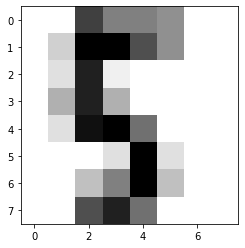

In [36]:
index = 25
print(data["target"][index])
plt.imshow(16 - data["data"][index].reshape(8,8), cmap="gray", vmin=0, vmax=16)

In [37]:
from skorch.regressor import NeuralNetRegressor
from skorch.utils import to_tensor, to_numpy
from skorch.net import NeuralNet

import torch
import torch.nn as nn

In [98]:
# This is a Neural Network where it'll be a CNN followed by a fully connected layer
class Example(nn.Module):
    def __init__(self):
        super(Example, self).__init__()
        """
        CNN = nn.Sequential(
            nn.Conv2d(1,16, kernel_size=3, padding=1, stride=1),
            nn.ReLU()
        )
        """
        self.FINAL = nn.Sequential(
            nn.Linear(64,64),
            nn.Linear(64,64),
            nn.Linear(64,10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.FINAL(x)
        return x

In [99]:
Example().forward(to_tensor(data["data"].astype(np.single), device="cpu"))

tensor([[1.0809, 1.5086, 0.0000,  ..., 0.0000, 0.3085, 0.0000],
        [0.0878, 1.7563, 0.6057,  ..., 0.0000, 0.3286, 0.0000],
        [0.0000, 1.2282, 0.5646,  ..., 0.2210, 0.6609, 0.0000],
        ...,
        [0.7648, 2.1294, 0.0000,  ..., 0.0000, 0.5024, 0.0000],
        [0.5641, 2.7074, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3867, 1.7069, 0.0000,  ..., 0.0000, 0.6122, 0.0755]],
       grad_fn=<ReluBackward0>)

In [100]:
true_target = np.zeros((len(data["target"]), 10)).astype(np.single)
for  idx, thing in enumerate(data["target"]):
    true_target[idx][thing] = 1
    
true_feature = to_tensor(data["data"].astype(np.single), device="cpu")
true_target = to_tensor(true_target, device="cpu")

In [101]:
simple_nn = NeuralNetRegressor(
    Example,
    max_epochs=1,
    batch_size=100,
    warm_start=True,
)

In [102]:
simple_nn.max_epochs=100
simple_nn.fit(true_feature, true_target)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1681        0.1033  0.0689
      2        0.0932        0.0961  0.0689
      3        0.0863        0.0912  0.0605
      4        0.0823        0.0879  0.0690
      5        0.0793        0.0855  0.0657
      6        0.0767        0.0837  0.0724
      7        0.0741        0.0818  0.0692
      8        0.0721        0.0801  0.0693
      9        0.0706        0.0786  0.0705
     10        0.0695        0.0773  0.0718
     11        0.0684        0.0762  0.0713
     12        0.0676        0.0753  0.0638
     13        0.0669        0.0744  0.0698
     14        0.0662        0.0735  0.1182
     15        0.0657        0.0729  0.0730
     16        0.0653        0.0723  0.0708
     17        0.0648        0.0718  0.0712
     18        0.0644        0.0713  0.0778
     19        0.0641        0.0708  0.0741
     20        0.0638        0.0704  0.0763
     21        0.0635        0.0

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Example(
    (FINAL): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=10, bias=True)
      (3): ReLU()
    )
  ),
)

In [91]:
simple_nn.module_.FINAL.apply(lambda s: print(s.weight))

Parameter containing:
tensor([[-0.0682,  0.0583, -0.0530,  0.0937, -0.1139,  0.0543, -0.0610,  0.0346,
         -0.1029, -0.0529,  0.0331, -0.1198,  0.0675, -0.0422,  0.0507,  0.0855,
         -0.0359, -0.0737, -0.1115,  0.1023, -0.0264,  0.0894, -0.1055,  0.1010,
          0.1048,  0.0235, -0.0558,  0.0308, -0.0337, -0.0468, -0.0640,  0.0014,
          0.0745,  0.0759, -0.0443, -0.0605,  0.0350,  0.0552,  0.1105,  0.1237,
         -0.0117, -0.0714, -0.0716,  0.0023, -0.0093,  0.0493,  0.0133, -0.1223,
         -0.0695, -0.0871, -0.1051, -0.0561, -0.0374,  0.0455, -0.1184, -0.0959,
          0.1205, -0.0795, -0.1223, -0.0029, -0.0978, -0.1356, -0.0249,  0.0818],
        [ 0.0268, -0.0151,  0.0594,  0.0007, -0.1805,  0.0184,  0.0588,  0.0713,
         -0.1118, -0.1249, -0.1760,  0.0042, -0.0618, -0.0826,  0.0063, -0.0493,
         -0.0999,  0.0408, -0.0771,  0.0466, -0.0897,  0.0043, -0.1119,  0.0797,
          0.0040, -0.0281, -0.0161, -0.0697, -0.1113,  0.0390, -0.1071, -0.0502,
     

AttributeError: 'ReLU' object has no attribute 'weight'